In [1]:
from gurobipy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 21
nodes = [i for i in range(n)]

In [3]:
arcs = [(i,j) for i in nodes for j in nodes if i!=j]

In [4]:
np.random.seed(0)

X = np.random.random(n)*100
Y = np.random.random(n)*100

In [5]:
distance = {(i,j): np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in nodes for j in nodes if i!=j}                  

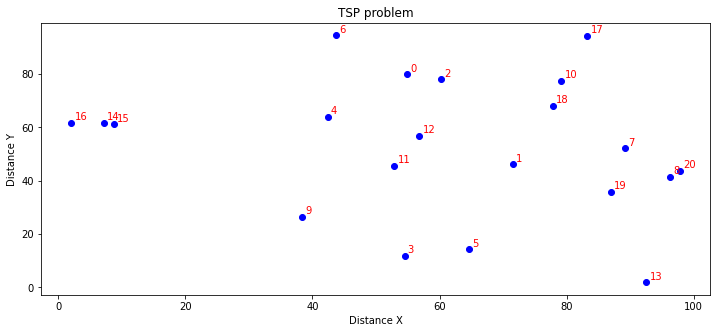

In [6]:
plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

for n in range(len(X)):
    plt.annotate(str(n), xy=(X[n],Y[n] ),
                xytext=(X[n]+0.5,Y[n]+1), color='red')
    
plt.xlabel('Distance X')
plt.ylabel('Distance Y')
plt.title("TSP problem")

plt.show()

In [7]:
model = Model('TSP1')

x = model.addVars(arcs, vtype = GRB.BINARY, name='x')
u = model.addVars(nodes, vtype = GRB.CONTINUOUS, name='u')

model.setObjective(quicksum(distance[i]*x[i] for i in arcs), GRB.MINIMIZE)

model.addConstrs(quicksum(x[i,j] for j in nodes if j!=i)==1 for i in nodes)
model.addConstrs(quicksum(x[i,j] for i in nodes if j!=i)==1 for j in nodes)

model.addConstrs((x[i,j]==1) >> (u[i]+1==u[j]) for i,j in arcs if j!=0)

# model.Params.timelimit = 60
# mode.Params.MIPGap = 0.1

model.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-18
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 42 rows, 441 columns and 840 nonzeros
Model fingerprint: 0xb0a32981
Model has 400 general constraints
Variable types: 21 continuous, 420 integer (420 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 400 rows and 400 columns
Presolve time: 0.08s
Presolved: 442 rows, 841 columns, 1850 nonzeros
Presolved model has 400 SOS constraint(s)
Variable types: 421 continuous, 420 integer (420 binary)

Root relaxation: objective 3.267793e+02, 78 iterations, 0.00 seconds (0.

In [8]:
# print('function objective', str(round(model.ObjVal,2)))
# for v in model.getVars():
#     if v.x>0.9:
#         print(str(v.VarName)+"="+str(v.x))

In [9]:
arcs_active = [i for i in arcs if x[i].x > 0.9]

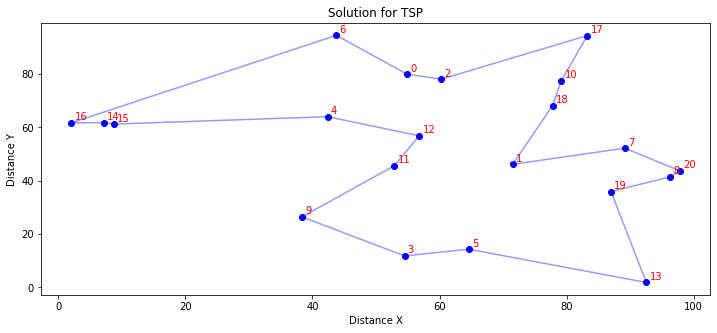

In [10]:
plt.figure(figsize=(12,5))
plt.scatter(x=X,y=Y,color='blue',zorder=1)

for i,j in arcs_active:
    plt.plot([X[i],X[j]],[Y[i],Y[j]],
                color='b', alpha=0.4, zorder=0)
    
for n in range(len(X)):
    plt.annotate(str(n), xy=(X[n],Y[n] ),
                xytext=(X[n]+0.5,Y[n]+1), color='red')
    
plt.xlabel('Distance X')
plt.ylabel('Distance Y')
plt.title("Solution for TSP")

plt.show()